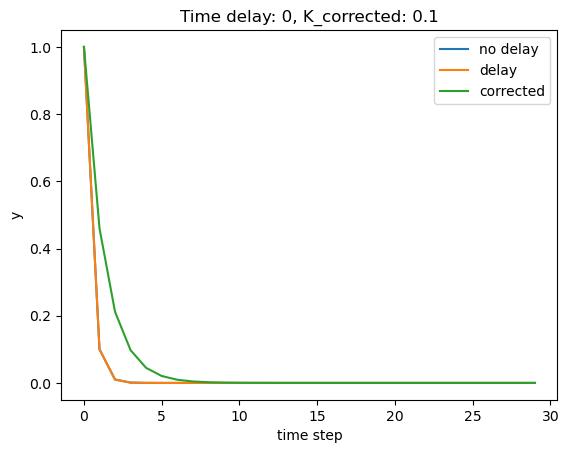

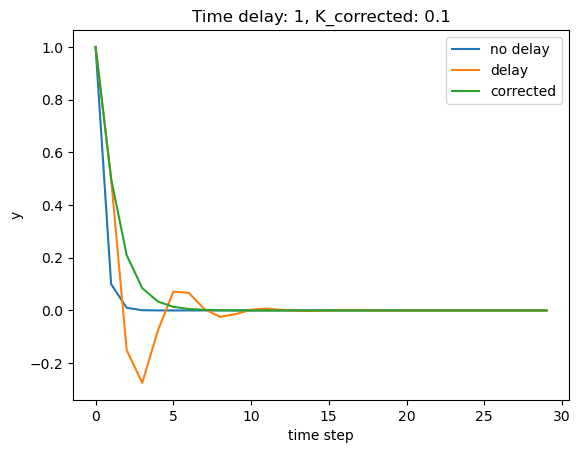

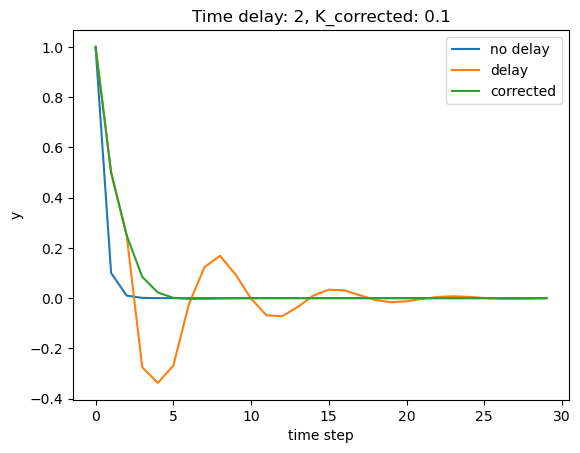

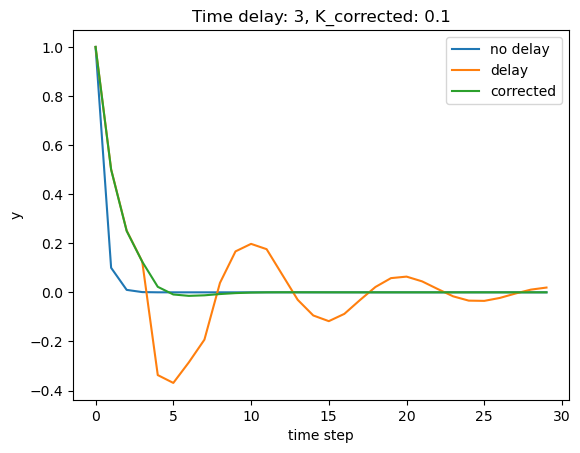

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Initialization
# Length of simulation (time steps)
simlen = 30
# Output
y_nodelay = np.zeros((simlen))
y_delayed = np.zeros((simlen))
y_corrected = np.zeros((simlen))
y_minus = np.zeros((simlen))
y_plus = np.zeros((simlen))
# Target
target = 0

# Controller gain
K = 1.0
K_corrected = 0.1
diff = 0.1
K_plus = K + diff
K_minus = K - diff

# K_plus = K_corrected*(1+diff)
# K_minus = K_corrected*(1-diff)

# Set first output
y_nodelay[0] = 1
y_delayed[0] = 1
y_corrected[0] =1
y_minus[0] = 1
y_plus[0] = 1

# TODO define the time delay
delay_time = [0, 1 ,2,3]

## Simulation
for delay_time in delay_time:
    for t in range(simlen-1):
        # Compute output
        # TODO include the time delay
        u_nodelay = K * (target - y_nodelay[t])
        y_nodelay[t+1]=0.5*y_nodelay[t] + 0.4*u_nodelay # 1st order dynamics

        u_delayed = K * (target - y_delayed[t-delay_time])
        y_delayed[t+1]=0.5*y_delayed[t] + 0.4*u_delayed # 1st order dynamics

        u_corrected = K_corrected * (target - y_corrected[t-delay_time])
        y_corrected[t+1]=0.5*y_corrected[t] + 0.4*u_corrected # 1st order dynamics

        u_minus = (K_minus) * (target - y_minus[t-delay_time])
        y_minus[t+1]=0.5*y_minus[t] + 0.4*u_minus # 1st order dynamics

        u_plus = (K_plus) * (target - y_plus[t-delay_time])
        y_plus[t+1]=0.5*y_plus[t] + 0.4*u_plus # 1st order dynamics


    ## Plot
    time = range(simlen)
    plt.plot(time, y_nodelay)
    plt.plot(time, y_delayed)
    plt.plot(time, y_corrected)
    plt.title(f"Time delay: {delay_time}, K_corrected: {K_corrected}")
    plt.legend(['no delay', 'delay', 'corrected'])
    plt.xlabel('time step')
    plt.ylabel('y')
    plt.show()

# plt.plot(time, y_nodelay)
# plt.plot(time, y_corrected)
# plt.plot(time, y_minus)
# plt.plot(time, y_plus)
# plt.title(f"Time delay: {delay_time}, K_corrected: {K_corrected}")
# plt.legend(['No delay','corrected', 'minus', 'plus'])
# plt.xlabel('time step')
# plt.ylabel('y')
# plt.show()